In [1]:
import pyvibdmc as pv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
snapshots = np.arange(20000,50000,1000) #pull wavefunctions every 1000 time steps between 20 000 and 50 000

tutorial_sim = pv.SimInfo(f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H5O3-/Data/NN_Data/360_3hidden_0_decay_0_dropout_double_sort/h2o_guided/1.0w_20000_walkers_50000t_1dt_250dw/H5O3_0_sim_info.hdf5')
coords, weights = tutorial_sim.get_wfns(snapshots)
coords = pv.Constants.convert(coords,'angstroms',to_AU=False) # Conversion of cds to angstroms

analyzer = pv.AnalyzeWfn(coords)

In [3]:
OHs = [[2,3],[5,6]]

total_lengths = []
total_weights = []
for pair in free_OHs:
    bond_length = analyzer.bond_length(pair[0],pair[1])
    total_lengths.append(bond_length)
    total_weights.append(weights)

lengths = np.concatenate(total_lengths)
dws = np.concatenate(total_weights)

n, bins = np.histogram(lengths,weights=dws,bins=100,density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.plot(bin_centers, n)
plt.xlabel(r'Free OH Distances ($\AA$)')
plt.ylabel('Probability Amplitude')
plt.show()

NameError: name 'free_OHs' is not defined

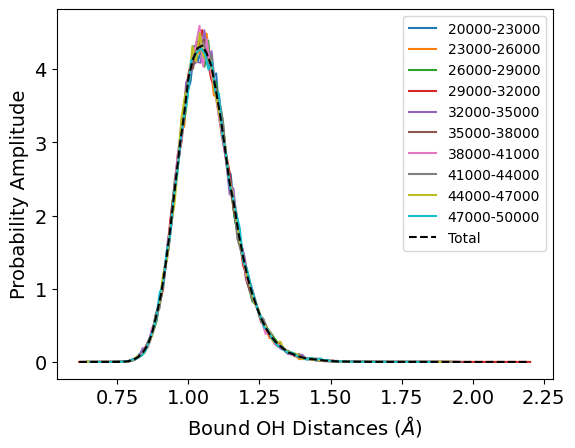

In [12]:
total_dists = []
total_dws = []

for i in np.arange(20000,50000,3000):

    snapshots = np.arange(i,i+3000,500) #pull wavefunctions every 1000 time steps between 20 000 and 50 000

    tutorial_sim = pv.SimInfo(f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H5O3-/Data/NN_Data/360_3hidden_0_decay_0_dropout_double_sort/h2o_guided/1.0w_20000_walkers_50000t_1dt_250dw/H5O3_0_sim_info.hdf5')
    coords, weights = tutorial_sim.get_wfns(snapshots)
    coords = pv.Constants.convert(coords,'angstroms',to_AU=False) # Conversion of cds to angstroms

    analyzer = pv.AnalyzeWfn(coords)

    total_lengths = []
    total_weights = []
    for pair in OHs:
        bond_length = analyzer.bond_length(pair[0],pair[1])
        total_lengths.append(bond_length)
        total_weights.append(weights)

    lengths = np.concatenate(total_lengths)
    dws = np.concatenate(total_weights)

    n, bins = np.histogram(lengths,weights=dws,bins=100,density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    plt.plot(bin_centers, n, label=f'{i}-{i+3000}')

    total_dists.append(lengths)
    total_dws.append(dws)

total_dists = np.concatenate(total_dists)
total_dws = np.concatenate(total_dws)

n, bins = np.histogram(total_dists,weights=total_dws,bins=100,density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.plot(bin_centers, n, label='Total',color='black', linestyle='dashed')

plt.legend(fontsize=10)

plt.xlabel(r'Bound OH Distances ($\AA$)')
plt.ylabel('Probability Amplitude')
plt.show()
    

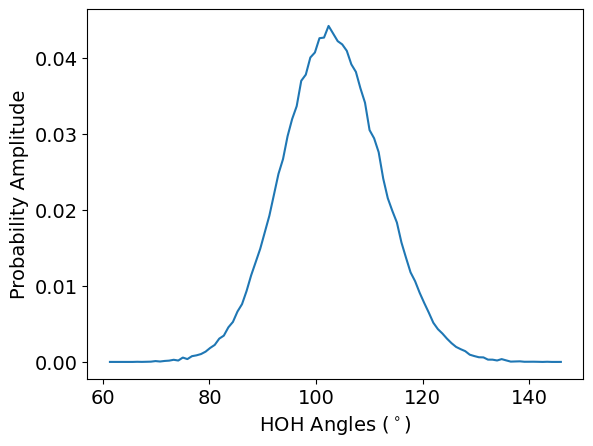

In [13]:
HOHs = [[3,2,4],[6,5,7]]

total_angs = []
total_weights = []
for angle in HOHs:
    bond_angle = analyzer.bond_angle(angle[0],angle[1],angle[2])
    total_angs.append(bond_angle)
    total_weights.append(weights)

angles = np.concatenate(total_angs)
dws = np.concatenate(total_weights)

n, bins = np.histogram(np.rad2deg(angles),weights=dws,bins=100,density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.plot(bin_centers, n)
plt.xlabel(r'HOH Angles ($^\circ$)')
plt.ylabel('Probability Amplitude')
plt.show()